### Problem 1
#### Question 1 : Building the model

In [1]:
# USEFUL IMPORTS
import mlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import sklearn.model_selection
import time
import math
import keras

Using TensorFlow backend.


In [2]:
# LOAD THE DATA
data = pd.read_csv("../../mnist_train.csv")
data2 = pd.read_csv("../../mnist_test.csv")

In [3]:
# SPLIT THEM INTO TRAIN VALID TEST SETS
X = data.values[:,1:]/255
Y = data.values[:,0]
X_test = data2.values[:, 1:]/255
Y_test = data2.values[:, 0]
X_train, X_valid, Y_train, Y_valid = sklearn.model_selection.train_test_split( X, Y, test_size=0.1666666, random_state=42)

In [4]:
print("Train set shape ", X_train.shape)
print("Valid set shape ", X_valid.shape)
print("Test  set shape ", X_test.shape)

Train set shape  (50000, 784)
Valid set shape  (10000, 784)
Test  set shape  (10000, 784)


#### Zero initialization

In [34]:
model1 = mlp.MLP_2L(784, 784, 480, 10, init="zeros", activation="identity")

Input dimension 784	Layer 1 dimension 784	Layer 2 dimension 480	Output dimension 10	 Initilization method zeros	Activation function identity
Total number of parameters : 997050


In [35]:
result1 = model1.fit(X_train, Y_train, epochs=5, batch_size=20, learning_rate=0.01, validation_data=(X_valid, Y_valid))
result1 = model1.fit(X_train, Y_train, epochs=5, batch_size=10, learning_rate=0.001, validation_data=(X_valid, Y_valid), previous = result1)
result1 = model1.fit(X_train, Y_train, epochs=2, batch_size=5, learning_rate=0.0005, validation_data=(X_valid, Y_valid), previous = result1)

Train on 50000 samples	Evaluate on 10000
 samples
Epoch 1/5		Total training time 0.3s
	Samples 50000/50000	Epoch time 57.08s	Accuracy 0.113	Loss 2.301	Valid accuracy 0.109	 Valid loss 2.302
Epoch 2/5		Total training time 57.7s
	Samples 50000/50000	Epoch time 56.85s	Accuracy 0.113	Loss 2.301	Valid accuracy 0.109	 Valid loss 2.302
Epoch 3/5		Total training time 114.9s
	Samples 50000/50000	Epoch time 56.01s	Accuracy 0.113	Loss 2.301	Valid accuracy 0.109	 Valid loss 2.302
Epoch 4/5		Total training time 171.3s
	Samples 50000/50000	Epoch time 55.54s	Accuracy 0.113	Loss 2.301	Valid accuracy 0.109	 Valid loss 2.302
Epoch 5/5		Total training time 227.1s
	Samples 50000/50000	Epoch time 55.17s	Accuracy 0.113	Loss 2.301	Valid accuracy 0.109	 Valid loss 2.302

Total training time 282.30s
Train on 50000 samples	Evaluate on 10000
 samples
Epoch 1/5		Total training time 0.4s
	Samples 50000/50000	Epoch time 96.22s	Accuracy 0.113	Loss 2.301	Valid accuracy 0.109	 Valid loss 2.302
Epoch 2/5		Total trainin

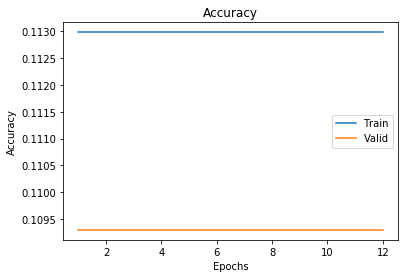

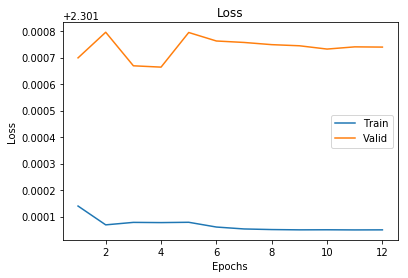

In [36]:
plt.plot(result1["epoch"],result1["train_acc"],label="Train")
plt.plot(result1["epoch"],result1["valid_acc"],label="Valid")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.figure()

plt.plot(result1["epoch"],result1["train_loss"],label="Train")
plt.plot(result1["epoch"],result1["valid_loss"],label="Valid")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

#### Normal initialization

In [52]:
model2 = mlp.MLP_2L(784, 500, 250, 10, init="normal", activation="identity")

Input dimension 784	Layer 1 dimension 500	Layer 2 dimension 250	Output dimension 10	 Initilization method normal	Activation function identity
Total number of parameters : 520260


In [53]:
result2 = model2.fit(X_train[:], Y_train[:], epochs=5, batch_size=20, learning_rate=0.000001, validation_data=(X_valid, Y_valid))

Train on 50000 samples	Evaluate on 10000
 samples
Epoch 1/5		Total training time 0.2s


KeyboardInterrupt: 

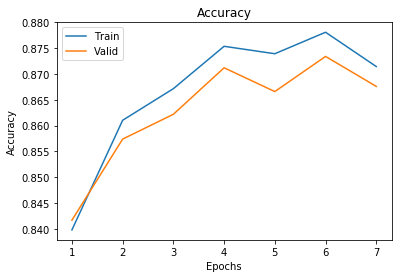

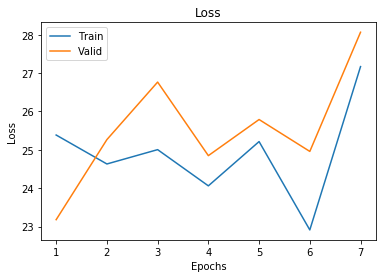

In [44]:
plt.plot(result2["epoch"],result2["train_acc"],label="Train")
plt.plot(result2["epoch"],result2["valid_acc"],label="Valid")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.figure()

plt.plot(result2["epoch"],result2["train_loss"],label="Train")
plt.plot(result2["epoch"],result2["valid_loss"],label="Valid")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

#### Glorot initialization

In [5]:
importlib.reload(mlp)

<module 'mlp' from '/home/adrien/Documents/IFT6135/assigment1/practical/mlp.py'>

In [6]:
model3 = mlp.MLP_2L(784, 500, 250, 10, init="glorot", activation="identity")

Input dimension 784	Layer 1 dimension 500	Layer 2 dimension 250	Output dimension 10	 Initilization method glorot	Activation function identity
Total number of parameters : 520260


In [7]:
result3 = model3.fit(X_train[:], Y_train[:], epochs=10, batch_size=1, learning_rate=0.01, validation_data=(X_valid, Y_valid), verbose=True )

Train on 50000 samples	Evaluate on 10000
 samples
Epoch 1/10		Total training time 0.3s
	Samples 50000/50000	Epoch time 484.20s	Accuracy 0.892	Loss 0.383	Valid accuracy 0.885	 Valid loss 0.387
Epoch 2/10		Total training time 484.8s
	Samples 50000/50000	Epoch time 446.78s	Accuracy 0.889	Loss 0.378	Valid accuracy 0.881	 Valid loss 0.400
Epoch 3/10		Total training time 931.9s
	Samples 50000/50000	Epoch time 466.67s	Accuracy 0.893	Loss 0.363	Valid accuracy 0.888	 Valid loss 0.384
Epoch 4/10		Total training time 1399.0s
	Samples 50000/50000	Epoch time 427.40s	Accuracy 0.851	Loss 0.523	Valid accuracy 0.841	 Valid loss 0.562
Epoch 5/10		Total training time 1826.7s
	Samples 50000/50000	Epoch time 462.47s	Accuracy 0.882	Loss 0.408	Valid accuracy 0.875	 Valid loss 0.431
Epoch 6/10		Total training time 2289.5s
	Samples 50000/50000	Epoch time 437.72s	Accuracy 0.903	Loss 0.341	Valid accuracy 0.897	 Valid loss 0.360
Epoch 7/10		Total training time 2727.5s
	Samples 50000/50000	Epoch time 422.78s	Accur

In [9]:
model4 = keras.models.Sequential()
model4.add( keras.layers.Dense(500, activation="relu", input_shape=(784,)))
model4.add( keras.layers.Dense(250, activation="relu"))
model4.add( keras.layers.Dense(10, activation="softmax"))
model4.compile(optimizer= keras.optimizers.SGD(), metrics=['accuracy'], loss="categorical_crossentropy")

In [17]:
model4.fit(X_train[:10000], mlp.onehot(Y_train[:10000],10), epochs=10, batch_size=1, validation_data=(X_valid, mlp.onehot(Y_valid,10) ) )

Train on 10000 samples, validate on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 29s 3ms/step - loss: 0.2197 - acc: 0.9289 - val_loss: 0.2285 - val_acc: 0.9288
Epoch 2/10
10000/10000 [==============================] - 29s 3ms/step - loss: 0.1148 - acc: 0.9624 - val_loss: 0.1759 - val_acc: 0.9483
Epoch 3/10
10000/10000 [==============================] - 29s 3ms/step - loss: 0.0670 - acc: 0.9796 - val_loss: 0.1707 - val_acc: 0.9534
Epoch 4/10
10000/10000 [==============================] - 29s 3ms/step - loss: 0.0452 - acc: 0.9855 - val_loss: 0.1731 - val_acc: 0.9488
Epoch 5/10
10000/10000 [==============================] - 28s 3ms/step - loss: 0.0305 - acc: 0.9896 - val_loss: 0.1672 - val_acc: 0.9563
Epoch 6/10
10000/10000 [==============================] - 29s 3ms/step - loss: 0.0146 - acc: 0.9962 - val_loss: 0.1844 - val_acc: 0.9569
Epoch 7/10
10000/10000 [==============================] - 29s 3ms/step - loss: 0.0098 - acc: 0.9974 - val_loss: 0.1480 - val_acc

#### Plot results

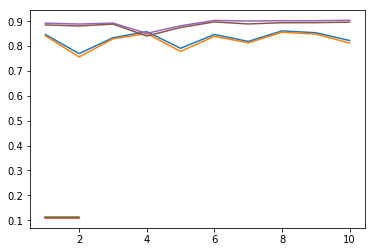

In [13]:
plt.plot(result2["epoch"],result2["train_acc"])
plt.plot(result2["epoch"],result2["valid_acc"])
plt.plot(result1["epoch"],result1["train_acc"])
plt.plot(result1["epoch"],result1["valid_acc"])
plt.plot(result3["epoch"],result3["train_acc"])
plt.plot(result3["epoch"],result3["valid_acc"])

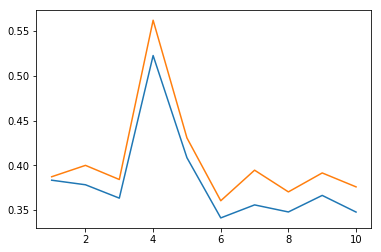

In [16]:
# plt.plot(result2["epoch"],result2["train_loss"])
# plt.plot(result2["epoch"],result2["valid_loss"])
# plt.plot(result1["epoch"],result1["train_loss"])
# plt.plot(result1["epoch"],result1["valid_loss"])
plt.plot(result3["epoch"],result3["train_loss"])
plt.plot(result3["epoch"],result3["valid_loss"])